# Code
...
# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# User Configuration

In [6]:
STATS_FILE = "20250301_data_20250510_100_epochs.pkl_losses.csv"
DATA_DIR = Path("data/models")
SAVE_FIG = True

# Set my design
sns.set_theme(
    style="white",
    context="paper",
    palette="colorblind",
    rc={
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "font.size": 7,
        "axes.titlesize": 7,
        "axes.labelsize": 7,
        "xtick.labelsize": 7,
        "ytick.labelsize": 7,
        "legend.fontsize": 7
    }
)

# Main Routine

In [3]:
df = pd.read_csv(DATA_DIR / STATS_FILE, sep=";", decimal=",", encoding="utf-8")

In [4]:
print(df.head())

   Epoch  Generator Loss  Discriminator Loss
0      0        1.006226           -0.026929
1      1       -0.009569            0.088786
2      2       -0.502889            0.050417
3      3       -1.260514            0.074529
4      4       -1.980885            0.175109


In [5]:
# DataFrame in ein langes Format bringen (für seaborn geeignet)
df_melted = df.melt(id_vars='Epoch', var_name='Loss Type', value_name='Loss Value')

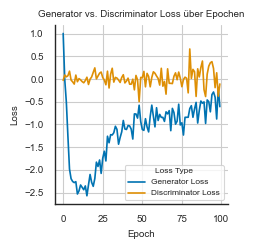

In [15]:

# Plot mit Seaborn
fig, ax = plt.subplots(figsize=(2.4, 2.5))
sns.lineplot(data=df_melted, x='Epoch', y='Loss Value', hue='Loss Type')

plt.title('Generator vs. Discriminator Loss über Epochen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax.legend(title='Loss Type', loc='lower right', fontsize=6, title_fontsize=6)
plt.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if SAVE_FIG:
    fig.savefig("Generator-Discriminator-Loss_100_epochs.tiff", dpi=300, format='tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
plt.show()